# Radiative Cooling Demo
This notebook will build the multi-layer structure described in Raman $et$ $al.$, Nature 515, 540-546 (2014), compute plot its emissivity in the solar region and in the atmospheric transmissivity region of the spectrum (~300-2500 nm for the former, 2500-20000 nm for the latter), and compute the cooling power for several different differences between the temperature of the structure and the ambient temperature.  

Two differences between this notebook and the structure described in Raman $et$ $al.$ to note: (1) in this example, we terminate the multilayer at the optically thick Ag layer; the full structure described by Raman $et$ $al.$ involved was grown on a silicon substrate and included a thin (10 nm) titanium adhesion layer. Due to the very small skin depth of silver in the visible and IR, these layers make virtually no contribution to the optical properties of the stack.  To confirm there is negligible transmission through the terminal silver layer, one can plot the transmissivity of the multilayer by uncommenting the indicated lines below to confirm no visible or IR light is transmissited through the stack. (2) The refractive index data for materials described by Raman $et$ $al.$ are determined by ellipsometry on as-fabricated materials, and likely differ from the refractive index data employed by WPTherml. 

In [1]:
import wpspecdev
from matplotlib import pyplot as plt
import numpy as np

test_args = {
    'Material_List': ['Air', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'HfO2', 'SiO2', 'Ag', 'Air'],
    'Thickness_List': [0, 230e-9, 485e-9, 688e-9, 13e-9, 73e-9, 34e-9, 54e-9, 200e-9, 0],
    'Wavelength_List': [300e-9, 60000e-9, 5000], # note new name for this key
    "cooling": True # note use of boolean not integer now
}

# start the spectrum driver
sf = wpspecdev.SpectrumFactory()
# create an instance using the TMM with the structure defined as above
cool_ml = sf.spectrum_factory('Tmm', test_args)


 Your spectra have been computed! 😎 
 Your angle-dependent spectra have been computed! 😎 
 Your radiative cooling quantities have been computed! 😎 


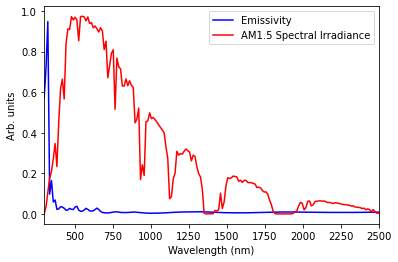

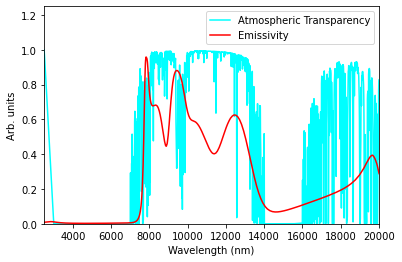

In [2]:
### plot emissivity of cool_ml against AM1.5 spectrum in the visible range
### to demonstrate the high solar reflectivity of cool_ml
plt.plot(cool_ml.wavelength_array*1e9, cool_ml.emissivity_array, 'blue', label='Emissivity')
plt.plot(cool_ml.wavelength_array*1e9, cool_ml._solar_spectrum/(1.4*1e9), 'red', label='AM1.5 Spectral Irradiance')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Arb. units")
plt.legend(loc = 'best')
plt.xlim(300,2500)
plt.show()

### plot the emissivity of cool_ml against the atmospheric transmissivity in the IR
### to demonstrate the selective thermal emissivity of cool_ml
plt.plot(cool_ml.wavelength_array*1e9, cool_ml._atmospheric_transmissivity, 'cyan', label='Atmospheric Transparency')
plt.plot(cool_ml.wavelength_array*1e9, cool_ml.emissivity_array, 'red', label='Emissivity')
### Uncomment the next line if you want to plot the transmissivity of
### the multilayer in the IR
#plt.plot(cool_ml.lambda_array*1e9, cool_ml.transmissivity_array, 'green', label='Transmissivity')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Arb. units")
plt.legend(loc = 'best')
plt.xlim(2500,20000)
plt.ylim(0,1.25)
plt.show()

Let's look at the quantities $P_{rad}$, $P_{sun}$, $P_{atm}$, and $P_{cool}$ where
- $P_{rad}$ is the power radiated from the structure to the sky, stored in the attribute `self.radiative_cooling_power`
- $P_{sun}$ is the solar power absorbed by the structure, stored in the attribute `self.solar_warming_power`
- $P_{atm}$ is the atmospheric radiation absorbed by the structure, stored in the attribute `self.atmospheric_warming_power`
- $P_{cool} = P_{rad} - P_{sun} - P_{atm}$ is stored in `self.net_cooling_power`

In [4]:
print("P_rad is ",cool_ml.radiative_cooling_power)
print("P_sun is ",cool_ml.solar_warming_power)
print("P_atm is ",cool_ml.atmospheric_warming_power)
print("P_cool is ",cool_ml.net_cooling_power)

P_rad is  123.61858037906478
P_sun is  14.032899774755494
P_atm is  38.31551650888121
P_cool is  71.27016409542807


In [5]:
# substitute Al2O3 for the top layer
cool_ml.insert_layer(2, 100e-9)
#cool_ml.compute_cooling()

 A  1e-07  m air layer has been inserted into layer numbe  2
 Use the `material_X( 2 ) command to define the material of this new layer!


In [6]:
cool_ml.material_Al2O3(2)
cool_ml.compute_cooling()

In [7]:
print("P_rad is ",cool_ml.radiative_cooling_power)
print("P_sun is ",cool_ml.solar_warming_power)
print("P_atm is ",cool_ml.atmospheric_warming_power)
print("P_cool is ",cool_ml.net_cooling_power)

P_rad is  128.06730688461536
P_sun is  14.166767271387467
P_atm is  40.272983589262736
P_cool is  73.62755602396516


In [8]:
# go back to SiO2 for the top layer
cool_ml.remove_layer(2)
cool_ml.compute_cooling()

In [9]:
print("P_rad is ",cool_ml.radiative_cooling_power)
print("P_sun is ",cool_ml.solar_warming_power)
print("P_atm is ",cool_ml.atmospheric_warming_power)
print("P_cool is ",cool_ml.net_cooling_power)

P_rad is  123.61858037906478
P_sun is  14.032899774755494
P_atm is  38.31551650888121
P_cool is  71.27016409542807
